In [2]:
import pyaudio
import librosa
from scipy.fft import fft, fftfreq
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [55]:
data = scio.loadmat('./noise/babble.mat')

In [12]:
type(data)

dict

In [56]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jul 18 20:46:22 2013',
 '__version__': '1.0',
 '__globals__': [],
 'babble': array([[-0.03659058],
        [-0.04348755],
        [-0.04980469],
        ...,
        [ 0.03012085],
        [ 0.03710938],
        [ 0.03024292]])}

In [57]:
type(data['babble'])

numpy.ndarray

In [58]:
data['babble'].shape

(4699904, 1)

In [59]:
y=data['babble'].reshape(-1)

In [60]:
y

array([-0.03659058, -0.04348755, -0.04980469, ...,  0.03012085,
        0.03710938,  0.03024292])

In [24]:
sf.available_subtypes('WAV')

{'PCM_16': 'Signed 16 bit PCM',
 'PCM_24': 'Signed 24 bit PCM',
 'PCM_32': 'Signed 32 bit PCM',
 'PCM_U8': 'Unsigned 8 bit PCM',
 'FLOAT': '32 bit float',
 'DOUBLE': '64 bit float',
 'ULAW': 'U-Law',
 'ALAW': 'A-Law',
 'IMA_ADPCM': 'IMA ADPCM',
 'MS_ADPCM': 'Microsoft ADPCM',
 'GSM610': 'GSM 6.10',
 'G721_32': '32kbs G721 ADPCM'}

In [23]:
sf.default_subtype('WAV')

'PCM_16'

In [61]:
sr=19980
sf.write('./noise/babble.wav', y, sr)

In [98]:
#音频合成，要求sample_rate相同
y1, sr = librosa.load('./无人机室内1.wav', sr=19980)
y2, sr = librosa.load('./noise/babble.wav', sr=19980)

if len(y1) < len(y2):
    length = abs(len(y2) - len(y1))
    temp_array = np.zeros(length, dtype=np.float32)
    y1 = np.concatenate((y1, temp_array))
elif len(y1) > len(y2):
    length = abs(len(y1) - len(y2))
    temp_array = np.zeros(length, dtype=np.float32)
    y2 = np.concatenate((y2, temp_array))
    
new_y = y1 + y2
sr=19980
sf.write('./synthesis.wav', new_y, sr)

In [8]:
#读取wav文件的音频数据
y, sr = librosa.load('./无人机室外-10米.wav', sr=None) #采样率可以指定

In [14]:
sr

48000

In [15]:
y.shape

(9408000,)

In [40]:
len(y)

96256

In [33]:
np.mean(np.abs(y))
yy=abs_subtract(y,np.mean(np.abs(y)))

In [58]:
def abs_subtract(array, num): #绝对值减:正的减，负的加
    coefficient=(np.ceil(array/(np.abs(array)*1.1).max())-0.5)*2
    return array-coefficient*num

def eliminate_dc(signal): #消除直流分量
    dc = np.mean(np.abs(signal))
    return abs_subtract(signal,dc)

In [32]:
a=np.array([1,2,3,4,5,-1,-2,-3,-4,-5])
abs_subtract(a, 10)

array([-9., -8., -7., -6., -5.,  9.,  8.,  7.,  6.,  5.])

In [28]:
np.mean(y)

-5.690604e-05

In [49]:
type(y)

numpy.ndarray

In [105]:
fft_y=fft(y)
abs_y=np.abs(fft_y) 

In [10]:
type(fft_y)

numpy.ndarray

In [53]:
fft_y.shape

(2205000,)

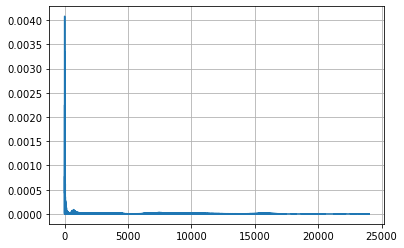

In [4]:
# Number of sample points
N = len(y)
# sample spacing
T = 1.0 / sr
x = np.linspace(0.0, N*T, N, endpoint=False)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [41]:
y_filt = librosa.effects.preemphasis(y)#预加重

In [9]:
y_filt.shape

(25248000,)

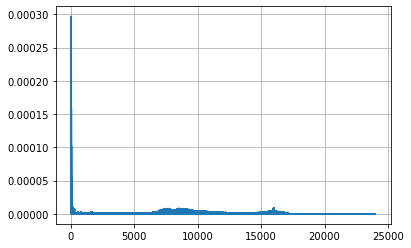

In [48]:
N = len(y_filt)
T = 1.0 / sr
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(y_filt)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [45]:
yf.shape

(96256,)

In [33]:
np.mean(y)

-5.690604e-05

48000


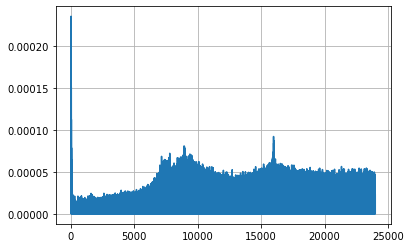

In [59]:
y, sr = librosa.load('./无人机室外-10米.wav', sr=None) #采样率可以指定
yy=eliminate_dc(y)    # 消除直流分量
y_filt = librosa.effects.preemphasis(yy)
#y_filt = abs_subtract(y_filt,np.mean(np.abs(y_filt)))
print(sr)
N = len(y_filt)
T = 1.0 / sr
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(y_filt)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [16]:
#分帧
librosa.time_to_frames(y, sr, hop_length=256, n_fft=512)

array([ 3,  3,  3, ..., -5, -2,  0])

In [18]:
#提取梅尔频谱特征
melspec = librosa.feature.melspectrogram(y, sr, n_fft=512, hop_length=512, n_mels=128, norm=None)
#n_fft指的是窗的大小，这里为512；hop_length表示相邻窗之间的距离，这里为256，也就是相邻窗之间有50%的overlap；n_mels为mel bands的数量，这里设为128

C:\Users\xuqiu\anaconda3\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


In [19]:
melspec.shape
#输出（频域维度，时域帧长度）

(128, 188)

In [19]:
type(melspec)

numpy.ndarray

In [6]:
#转化为对数量纲
logmelspec = librosa.power_to_db(melspec)
logmelspec.shape

(128, 25912)

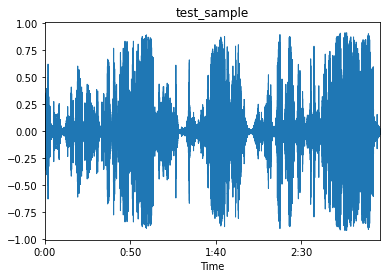

In [34]:
#绘制声音波形
import librosa.display
plt.figure()
librosa.display.waveplot(y, sr)
plt.title('test_sample')
plt.show()

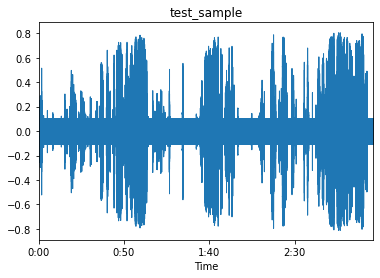

In [35]:
yy=abs_subtract(y,np.mean(np.abs(y)))     # 消除直流分量
#x = xx/np.max(np.abs(xx)) # 幅值归一化
#绘制声音波形
import librosa.display
plt.figure()
librosa.display.waveplot(yy, sr)
plt.title('test_sample')
plt.show()

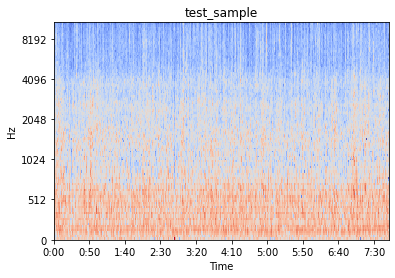

In [77]:
#绘制声谱图
plt.figure()
#一定要选择对数梅尔频谱特征，否则会报错
librosa.display.specshow(logmelspec, sr=sr, x_axis='time', y_axis='mel')
plt.title('test_sample')
plt.show()

In [10]:
#提取MFCC梅尔倒谱
mfccs = librosa.feature.mfcc(S=logmelspec, n_mfcc=40)

In [39]:
mfccs

array([[-4.8151883e+02, -4.8540558e+02, -4.8190863e+02, ...,
        -2.2576062e+02, -2.2607126e+02, -2.3490697e+02],
       [ 1.5778076e+01,  2.3144054e+01,  1.8920273e+01, ...,
        -3.5370964e+01, -5.1176640e+01, -5.6261002e+01],
       [ 2.4181610e+01,  2.2103115e+01,  1.7386553e+01, ...,
        -9.5309153e+00, -1.1252867e+01, -2.2731901e+01],
       ...,
       [-5.4725256e+00, -1.6446270e+00, -3.4020200e+00, ...,
        -5.1429987e-02, -3.4585528e+00, -7.4396133e+00],
       [-4.0746784e+00, -3.1131830e+00, -3.1795938e+00, ...,
         1.1230679e+00, -7.0700092e+00, -5.4344845e-01],
       [-4.9892845e+00, -5.0581789e+00,  1.4468896e-01, ...,
        -1.8164301e+00,  1.5977468e+00,  1.0385277e+01]], dtype=float32)

In [11]:
mfccs.shape

(40, 25912)

In [19]:
a=mfccs.reshape(40,25912,1)
X=[]
X.append(a)
type(X)

list

In [8]:
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)

In [42]:
mfccs.shape

(40, 4307)

In [43]:
mfccs

array([[-525.0179   , -421.90234  , -387.8476   , ..., -290.07455  ,
        -281.06302  , -282.42853  ],
       [  27.523338 ,  111.1599   ,  119.81163  , ...,   28.018148 ,
          36.171646 ,   35.834362 ],
       [  25.070957 ,   28.284237 ,   20.761818 , ...,   -6.3384104,
          -5.726186 ,   -2.1958032],
       ...,
       [   2.5023475,    1.2252564,    1.4072706, ...,    0.7926111,
          -1.6624668,   -1.59276  ],
       [   2.0747857,    1.1231377,    1.0891263, ...,    3.8725047,
           2.0526946,   -4.0662203],
       [   2.384128 ,    0.7782145,    0.8447353, ...,    1.3816152,
          -1.6885536,    3.5179152]], dtype=float32)

In [17]:
len(y)

96000

In [18]:
intervals = librosa.effects.split(y, top_db=20)
wav_output = []
for sliced in intervals:
    wav_output.extend(y[sliced[0]:sliced[1]])

In [19]:
len(intervals)

2

In [20]:
intervals

array([[57856, 60416],
       [66560, 96000]])

In [21]:
len(wav_output)

32000

In [22]:
wav_output = []
wav_output.extend(y)
len(wav_output)

96000

In [23]:
type(wav_output)

list